**IMPORT CSV**

In [42]:
import geopandas as gpd
import pandas as pd

In [43]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_bu_azizah/indonesia/ch4/tcch4_molar_new.csv')

**SET THE TIME TO .DATETIME FORMAT**

In [44]:
# overwriting data after changing format
df_csv['time']= pd.to_datetime(df_csv['time'])
 
# info of data
df_csv.info()
 
# display
print(df_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335440 entries, 0 to 5335439
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   time       datetime64[ns]
 1   latitude   float64       
 2   longitude  float64       
 3   tcch4      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 162.8 MB
        time  latitude  longitude        tcch4
0 2016-01-01    -12.34      94.57  1810.039307
1 2016-01-01    -12.34      94.67  1809.975049
2 2016-01-01    -12.34      94.77  1809.910791
3 2016-01-01    -12.34      94.87  1809.846533
4 2016-01-01    -12.34      94.97  1809.782275


In [45]:
df_csv['month'] = df_csv['time'].dt.month

In [46]:
df_csv['year'] = df_csv['time'].dt.year

**IMPORT SHP FILE**

In [47]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_bu_azizah/Peta Indonesia/dataframe.shp")

**CREATE GEOMETRY FROM SHP AND CSV**

In [48]:
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')

In [49]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')
result

In [9]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')

#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'tcch4', 'WADMPR_left', 'geometry', 'time']]

**SHOW THE COLUMNS**

In [10]:
#input the columns to get the pm2.5 average/year
dissolved_result = result_pop.dissolve(by=['WADMPR_left'], aggfunc='mean')

dissolved_result.reset_index(inplace=True)
dissolved_result.head()

,WADMPR_left,geometry,longitude,latitude,month,year,tcch4,time
0,Aceh,POINT (96.93184 4.22579),96.931842,4.225789,6.5,2019.0,1857.443068,2019-06-16 18:40:00
1,Bali,POINT (115.10571 -8.41143),115.105714,-8.411429,6.5,2019.0,1833.973782,2019-06-16 18:40:00
2,Banten,POINT (106.13818 -6.47636),106.138182,-6.476364,6.5,2019.0,1855.514290,2019-06-16 18:40:00
3,Bengkulu,POINT (102.36630 -3.52519),102.366296,-3.525185,6.5,2019.0,1847.514398,2019-06-16 18:40:00
4,DKI Jakarta,POINT (106.82000 -6.34000),106.820000,-6.340000,6.5,2019.0,1864.623360,2019-06-16 18:40:00


In [11]:
#download data to .csv format
dissolved_result.to_csv('CH4 5 years.csv')

**SET FOR MAPPING**

In [33]:
# ubah per month
import pandas as pd

In [34]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)

In [35]:
dissolved_result_df = dissolved_result_df.sort_values(by=['year'])

In [15]:
#download data to .csv format
dissolved_result_df.to_csv('tcch4_kabkot_year.csv')

In [36]:
import calendar
import matplotlib.pyplot as plt

In [37]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner')
print(polygon_result.columns)

Index(['WADMPR', 'NAMOBJ', 'LUAS', 'geometry', 'index_right', 'WADMPR_left',
       'longitude', 'latitude', 'month', 'year', 'tcch4', 'time'],
      dtype='object')


In [38]:
polygon_result = polygon_result.sort_values(by=['WADMPR_left'])

In [39]:
polygon_result = polygon_result.rename(columns={'index_right': 'indexr', 'WADMPR_left': 'WADMPRl'})
polygon_result = polygon_result.drop(['time','year','month'], axis = 1)

<Axes: >

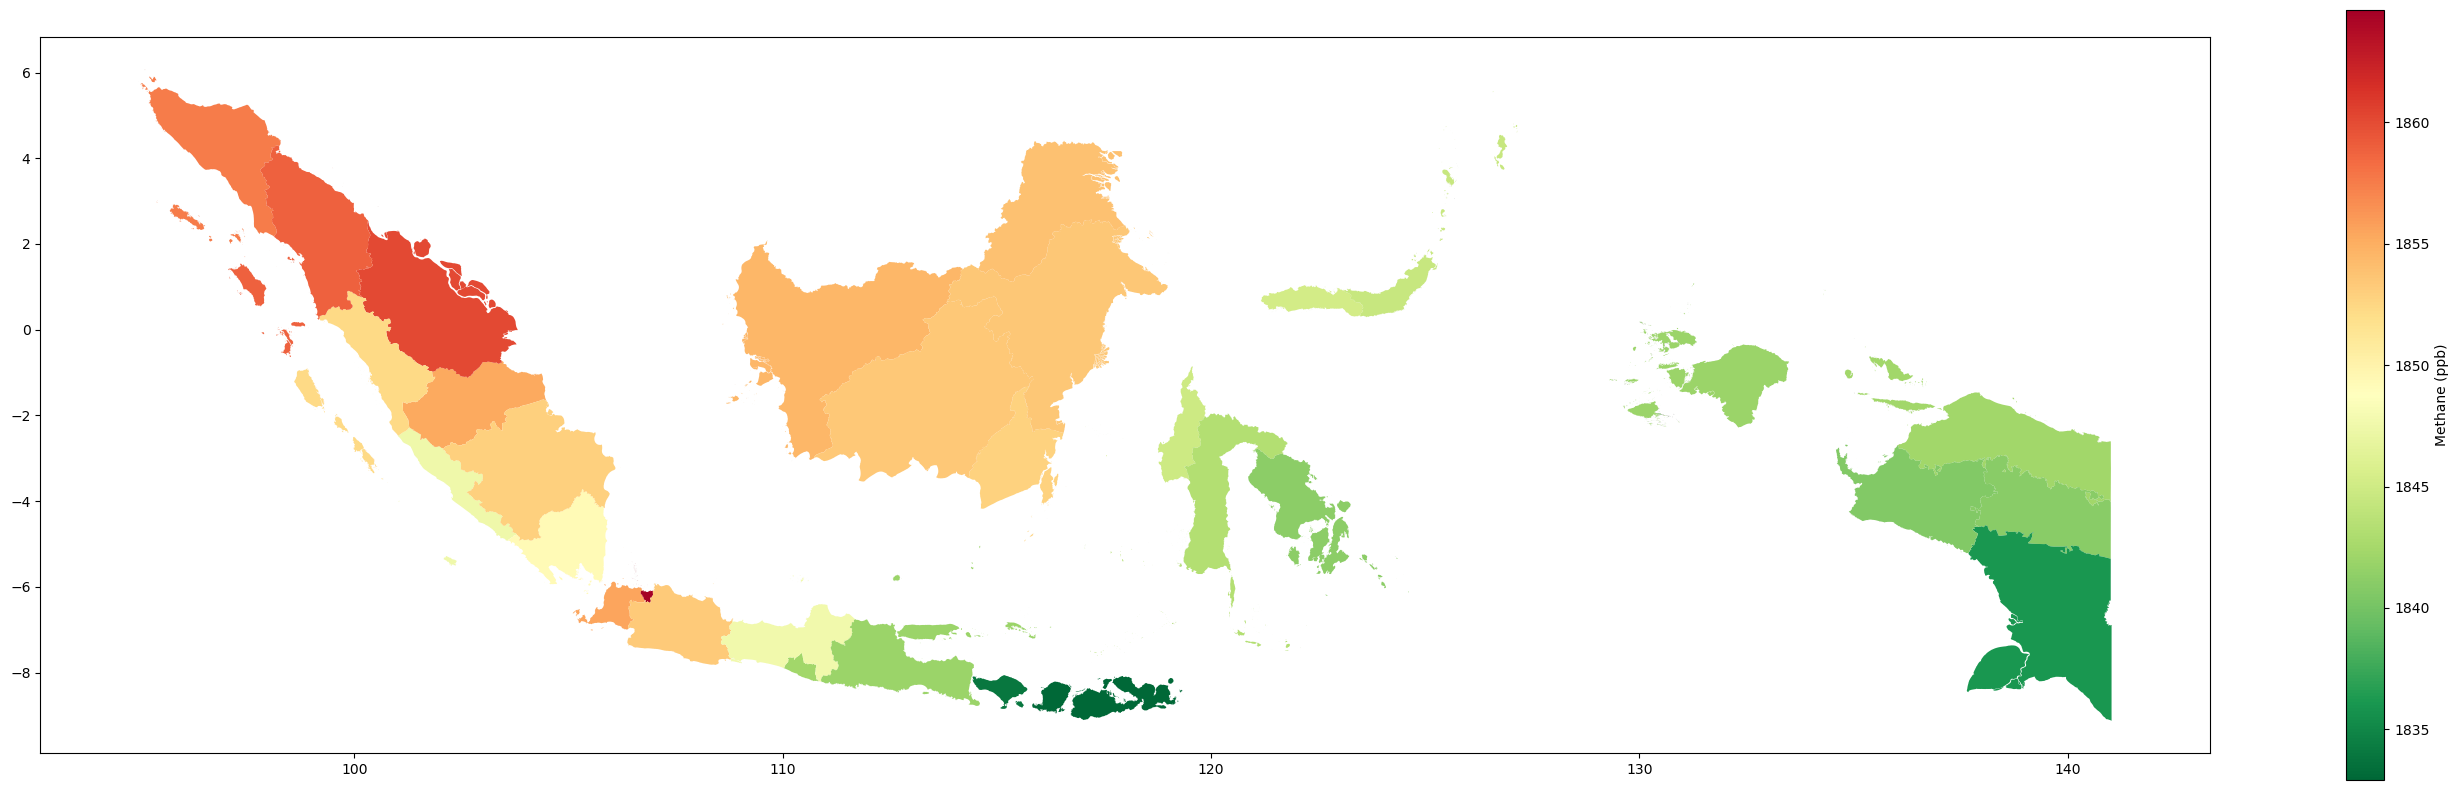

In [40]:
polygon_result.plot(figsize= (35, 10), column="tcch4", legend=True, cmap= 'RdYlGn_r', legend_kwds={"label": "Methane (ppb)"})

In [41]:
polygon_result.to_file('Peta CH4.shp')

**GRAPHS**

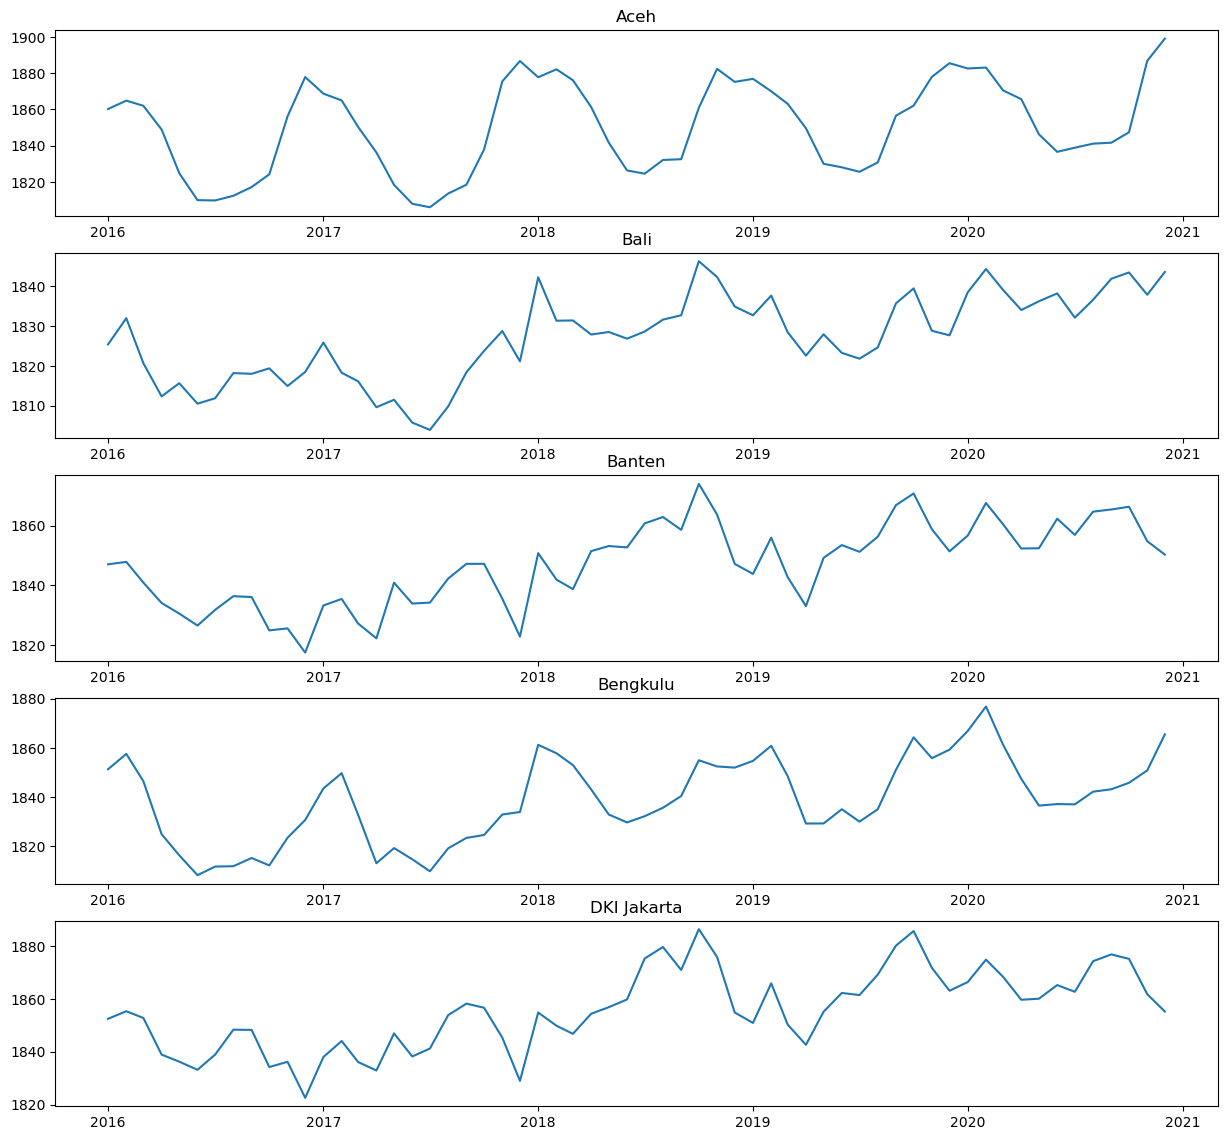

In [ ]:
# There are 5 graphs, each city has 1 graph which shows time series from Jan 2018 to Dec 2022
fig  = plt.figure(figsize=(15,40))
cities = list(dissolved_result_df['WADMPR'].unique())
dissolved_result_df = dissolved_result_df.set_index('time')

# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['WADMPR'] == city]
    
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['tcch4'])
    plt.title(city)
    #ax.set_title(f'{city}')